In [47]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as mpatches


In [2]:
path = '/home/dkabe/Model_brainstorming/Output/Variable_vals/'

In [24]:
Manufacturing_plants = 6
Distribution = 4
Market = 29
num_Scenarios = 128
Products = 3
Outsourced = 3
r_level = 0.5

In [4]:
demand = np.loadtxt('/home/dkabe/Model_brainstorming/Input_Data/Realistic/Instance_1/Demand_1.txt').reshape((128, 3, 29))
text_file = open('/home/dkabe/Model_brainstorming/Input_Data/Realistic/Instance_1/scen_1.txt', "r")
ls = text_file.read().split('\n')[:-1]
Scen = list(map(lambda x: ast.literal_eval(x), ls))

In [86]:
index = 56

In [87]:
f = open(path + "Instance_1/variable_vals_" +str(r_level) + ".txt", "r")
text = f.read()
f.close()
solutions_str = text.split('\n')
for i in solutions_str:
    exec(i.lstrip().rstrip())

In [88]:
Scen[56]

[[1, 1, 0, 0, 0, 0], (0, 1, 1, 1)]

In [89]:
Y_mat = np.array(list(v_val_Y_ijm.values())).reshape(num_Scenarios, Products, Manufacturing_plants, Distribution)
Z_mat = np.array(list(v_val_Z_jkm.values())).reshape(num_Scenarios, Products, Distribution, Market)
T1_mat = np.array(list(v_val_T_ljm.values())).reshape(num_Scenarios, Products, Outsourced, Distribution)
T2_mat = np.array(list(v_val_T_lkm.values())).reshape(num_Scenarios, Products, Outsourced, Market)
Y = sum(Y_mat[index])
Z = sum(Z_mat[index])
T1 = sum(T1_mat[index])
T2 = sum(T2_mat[index])

In [90]:
MP = ["I_" + str(i) for i in range(Manufacturing_plants)]
DC = ["J_" + str(j) for j in range(Distribution)]
MZ = ["K_" + str(k) for k in range(Market)]
Position_dic = {}
Node_colors = []
Edge_colors = []
Node_size = []
Weight = []
Weight_ij = []
Weight_jk = []
Max_p = max(Manufacturing_plants, Distribution, Market)

/home/dkabe/env_gurobi/lib/python3.7/site-packages/ipykernel_launcher.py:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


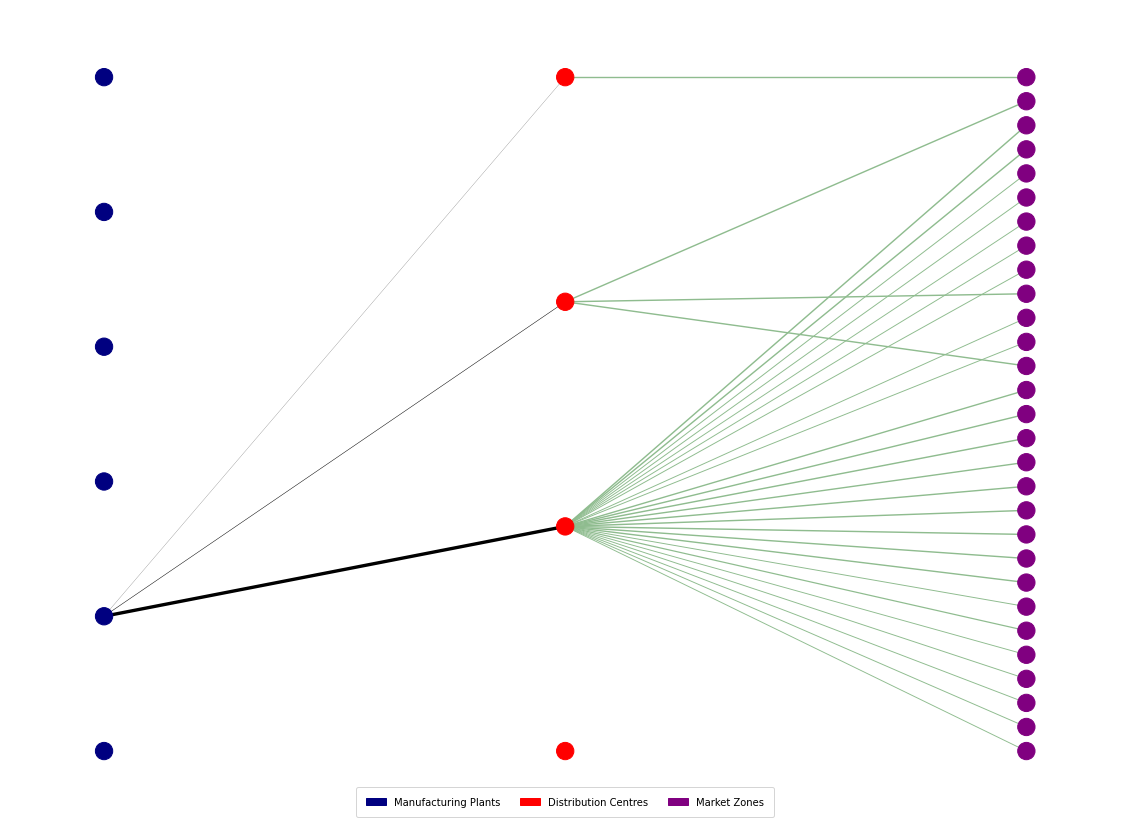

In [91]:

IJ_edges = []
for i in range(Manufacturing_plants):
    for j in range(Distribution):
        #if Y[i][j] > 0:
        IJ_edges.append(("I_" + str(i), "J_" + str(j)))    
Weight_ij.extend(Y.sum(axis=1))
    
JK_edges = []
for j in range(Distribution):
    for k in range(Market):
        #if Z[j][k] > 0:
        JK_edges.append(("J_" + str(j), "K_" + str(k)))
Weight_jk.extend(Z.sum(axis=1))
    
Weight.extend([4*Y[i][j]/max(Weight_ij) for i in range(Manufacturing_plants) for j in range(Distribution)])
Weight.extend([29*Z[j][k]/max(Weight_jk) for j in range(Distribution) for k in range(Market)])
            
Labels = []
Graph = nx.Graph()

Position_values = []
y_pos = np.linspace(0, Max_p, Manufacturing_plants)
for i in range(Manufacturing_plants):
    position = (0, y_pos[i])
    Graph.add_node(MP[i])
    Node_colors.append('navy')
    Labels.append("i" + str(i))
    Position_values.append(np.asarray(position))
Position_dic = dict(zip(MP, Position_values))

Position_values = []
y_pos = np.linspace(0, Max_p, Distribution)
for j in range(Distribution):
    position = (1, y_pos[j])
    Graph.add_node(DC[j])
    Node_colors.append('red')
    Labels.append("j" + str(j))
    Position_values.append(np.asarray(position))
Position_dic.update(dict(zip(DC, Position_values)))

Position_values = []
y_pos = np.linspace(0, Max_p, Market)
for k in range(Market):
    position = (2, y_pos[k])
    Graph.add_node(MZ[k])
    Node_colors.append('purple')
    Labels.append("k" + str(k))
    Position_values.append(np.asarray(position))
Position_dic.update(dict(zip(MZ, Position_values)))

# Add Edges

Graph.add_edges_from(IJ_edges)
Graph.add_edges_from(JK_edges)
Edge_colors.extend(['black' for i in IJ_edges])
Edge_colors.extend(['darkseagreen' for i in JK_edges])

nodePos = nx.shell_layout(Graph)
nx.draw_networkx(Graph, with_labels = False, node_color = Node_colors, edge_color = Edge_colors, pos = Position_dic, width = Weight)

limits=plt.axis('off')
plt.gcf().set_size_inches(20, 15)

lengend_mp = mpatches.Patch(color = 'navy', label = 'Manufacturing Plants')
lengend_dc = mpatches.Patch(color = 'red', label = 'Distribution Centres')
lengend_mz = mpatches.Patch(color = 'purple', label = 'Market Zones')

ax = plt.subplot(111)
ax.legend(loc = 'lower center', handles=[lengend_mp, lengend_dc, lengend_mz], ncol = 3, borderpad=1)

plt.show()

In [92]:
Position_dic = {}
Node_colors = []
Edge_colors = []
Weight = []
Weight_lk = []
Max_p = max(Outsourced, Market)
O = ["L_" + str(l) for l in range(Outsourced)]


/home/dkabe/env_gurobi/lib/python3.7/site-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


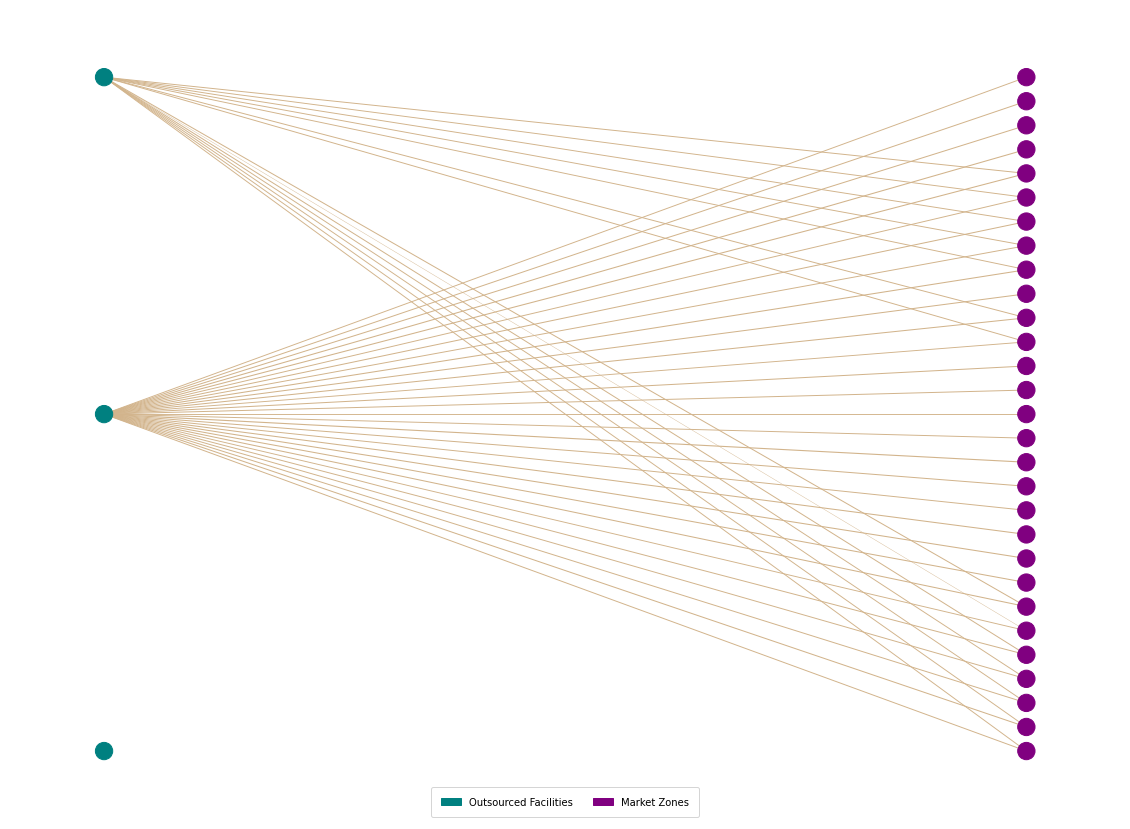

In [93]:
LK_edges = []
for l in range(Outsourced):
    for k in range(Market):
        #if Tlk[l][k] > 0:
        LK_edges.append(("L_" + str(l), "K_" + str(k)))    
Weight_lk.extend(T2.sum(axis = 1))

Weight.extend([29*T2[l][k]/max(Weight_lk) for l in range(Outsourced) for k in range(Market)])
            
Labels = []
Graph = nx.Graph()

Position_values = []
y_pos = np.linspace(0, Max_p, Outsourced)
for l in range(Outsourced):
    position = (0, y_pos[l])
    Graph.add_node(O[l])
    Node_colors.append('teal')
    Labels.append("l" + str(l))
    Position_values.append(np.asarray(position))
Position_dic = dict(zip(O, Position_values))

Position_values = []
y_pos = np.linspace(0, Max_p, Market)
for k in range(Market):
    position = (1, y_pos[k])
    Graph.add_node(MZ[k])
    Node_colors.append('purple')
    Labels.append("k" + str(k))
    Position_values.append(np.asarray(position))
Position_dic.update(dict(zip(MZ, Position_values)))


# Add edges
Graph.add_edges_from(LK_edges)
Edge_colors.extend(['tan' for l in LK_edges])

nodePos = nx.shell_layout(Graph)
nx.draw_networkx(Graph, with_labels = False, node_color = Node_colors, edge_color = Edge_colors, pos = Position_dic, width = Weight)

limits=plt.axis('off')
plt.gcf().set_size_inches(20, 15)

lengend_o = mpatches.Patch(color = 'teal', label = 'Outsourced Facilities')
lengend_dc = mpatches.Patch(color = 'purple', label = 'Market Zones')

ax = plt.subplot(111)
ax.legend(loc = 'lower center', handles=[lengend_o, lengend_dc], ncol = 2, borderpad=1)

plt.show()